In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Génération de problème d'optimisation

In [13]:
class function:
    def __init__(self, dim, value, grad, hessian):
        self.dim = dim
        self.value = value
        self.grad = grad
        self.hessian = hessian

In [14]:
class probleme:
    def __init__(self, f):
        self.f = f
        
    def __call__(self, x):
        return self.f.value(x)

In [15]:
f_d = {
    "dim": 1,
    "value": lambda x: x[0]**2 - 5 * x[0] + 3,
    "grad": lambda x: np.array([2*x[0] - 5]),
    "hessian": lambda x: np.diag([2])
}
f = function(**f_d)
P = probleme(f)

In [28]:
f_d_2 = {
    "dim": 1,
    "value": lambda x: x[0]**4 - 10 * x[0] + 3,
    "grad": lambda x: np.array([4*x[0]**3 - 10]),
    "hessian": lambda x: np.diag(np.array([12*x[0]**2]))
}
f_2 = function(**f_d_2)
P_2 = probleme(f_2)

In [32]:
f_d_3 = {
    "dim": 1,
    "value": lambda x: x[0]**6 - 10 * x[0]**2,
    "grad": lambda x: np.array([6*x[0]**5 - 20 * x[0]]),
    "hessian": lambda x: np.diag(np.array([30*x[0]**4 - 20]))
}
f_3 = function(**f_d_3)
P_3 = probleme(f_3)

In [51]:
f_d_4 = {
    "dim": 1,
    "value": lambda x: 36 * x[0]**2,
    "grad": lambda x: np.array([72 * x[0]]),
    "hessian": lambda x: np.diag([72])
}
f_4 = function(**f_d_4)
P_4 = probleme(f_4)

In [52]:
f_d_5 = {
    "dim": 1,
    "value": lambda x: 10 * x[0]**2 - 5 * x[0] + 3,
    "grad": lambda x: np.array([20 * x[0] - 5]),
    "hessian": lambda x: np.diag([20])
}
f_5 = function(**f_d_5)
P_5 = probleme(f_5)

In [57]:
f_d_6 = {
    "dim": 1,
    "value": lambda x: 10 * x[0]**6 - 5 * x[0]**5 + 3 * x[0]**4 - 2 * x[0]**3 + 15 * x[0]**2 - 12 * x[0] + 15,
    "grad": lambda x: np.array([60 * x[0]**5 - 25 * x[0]**4 + 12 * x[0]**3 - 6 * x[0]**2 + 30 * x[0] - 12]),
    "hessian": lambda x: np.diag([300 * x[0]**4 - 100 * x[0]**3 + 36 * x[0]**2 - 12 * x[0] + 30])
}
f_6 = function(**f_d_6)
P_6 = probleme(f_6)

# Méthode de Newton

In [58]:
def backtracking(f, x, alpha=0.1, beta=0.8):
    pass

In [59]:
class Newton:
    def __init__(self, f, epsilon=0.01):
        self.epsilon = epsilon
        self.f = f
        self.save = np.array([])
        
    def __call__(self, x0):
        self.save = []
        x = x0
        self.save.append(x)
        dxN = -1 * np.dot(np.linalg.inv(self.f.hessian(x)), self.f.grad(x))
        lmd = -1 * np.dot(self.f.grad(x).T, dxN)
        while lmd / 2 > self.epsilon:
            dxN = -1 * np.dot(np.linalg.inv(self.f.hessian(x)), self.f.grad(x))
            lmd = -1 * np.dot(self.f.grad(x).T, dxN)
            t = 0.5
            x = x + t * dxN
            self.save.append(x)
        self.save = np.array(self.save)
        return x
    
    def plot(self):
        if self.save.shape[0] == 0:
            raise Exception("The Newton method algorithm has not been run")
        if self.f.dim == 1:
            plt.figure(figsize=(15, 15))
            x = np.linspace(-6, 6, 1000).reshape((1, -1))
            plt.plot(x.reshape((-1)), self.f.value(x))
            plt.plot(self.save[:, 0], np.zeros((self.save.shape[0])), "rx")
            plt.show()
        elif self.f.dim == 2:
            plt.figure(figsize=(15, 15))
            x, y = np.linspace(-2, 2, 200), np.linspace(-2, 2, 200)
            X, Y = np.meshgrid(x, y)
            x_y = np.vstack([X.reshape(1, -1), Y.reshape(1, -1)]).reshape(2, -1)
            plt.contour(X, Y, self.f.value(x_y).reshape(200, -1), 15)
            plt.plot(self.save[:, 0], self.save[:, 1], "rx")
            plt.grid()
            plt.show()
        else:
            raise Exception("Dimension > 2 not implemented")

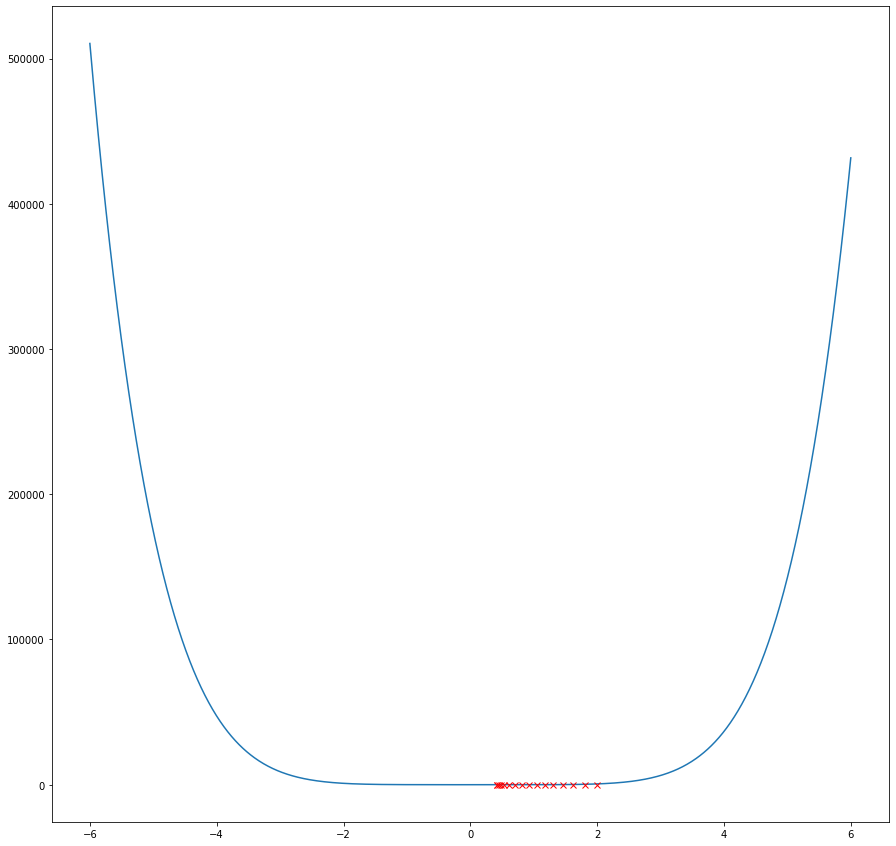

In [60]:
meth = Newton(f_6)
meth(np.array([2, 2]))
meth.plot()